# Predict the onset of diabetes based on diagnostic measures

In [106]:
# Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import plotly.express as px
from pandas.plotting import scatter_matrix
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data using pandas read function
df=pd.read_csv('F:\diabetes.csv')

In [4]:
# First five row of dataframe
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Exploratory Data Analysis

In [5]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* There is no null values
* Most of the values are integers
* BMI and DiabetesPedigreeFunction are float

In [6]:
# Checking Dataframe has how columns and row
print('The dataframe has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataframe has 768 rows and 9 columns.


In [7]:
# Print Dataframe column list
print('The columns are named: ', df.columns.to_list())

The columns are named:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [8]:
# Stastical information about dataset
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

* Greatest variation is insulin
* Many features have a minimum of 0. Is this feasible?
  * someone can not have 0 for BMI, Glucose, or BloodPressure
* Insulin maximum is 846, is this possible or an anamoly cause by a typo? Need to research.

In [9]:
# To know the more about the dataset with transpose
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [10]:
# Checking there is some null values or not
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [11]:
# Checking the null values in dataframe
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* There is no any null values in dataset

In [12]:
# checking any nan values or not
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# Showing count of nan
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Here, glucose have 5 nan values,BloodPressure have 35 nan values,SkinThickness have 227 nan values, Insullin have 374 nan values and BMI have 11 nan values.

<Axes: xlabel='Pregnancies', ylabel='count'>

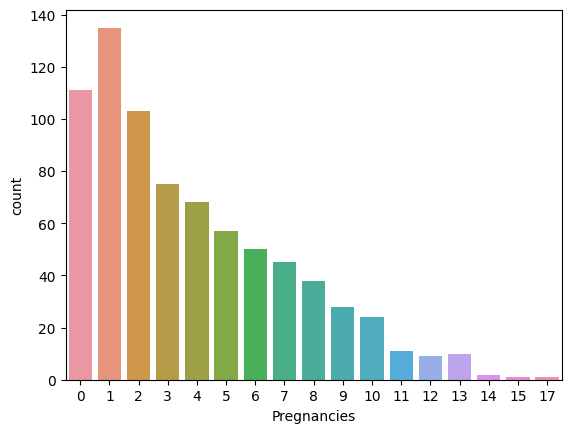

In [13]:
sns.countplot(x='Pregnancies',data=df) # Bar plot of Pregnanacies column

<Axes: xlabel='Glucose', ylabel='count'>

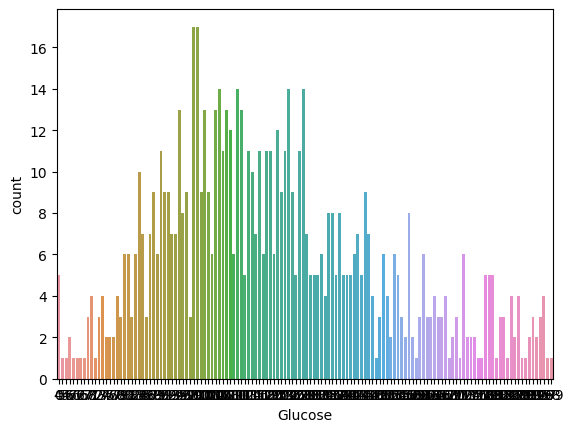

In [14]:
sns.countplot(x='Glucose',data=df) # Bar plot of Glucose column

<Axes: xlabel='BloodPressure', ylabel='count'>

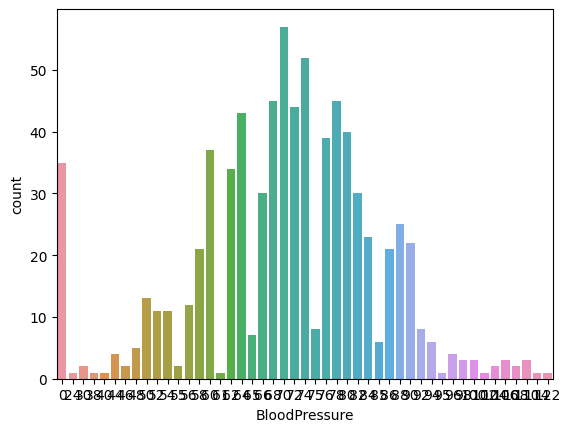

In [15]:
sns.countplot(x='BloodPressure',data=df) # Bar plot of BloodPressure column

<Axes: xlabel='SkinThickness', ylabel='count'>

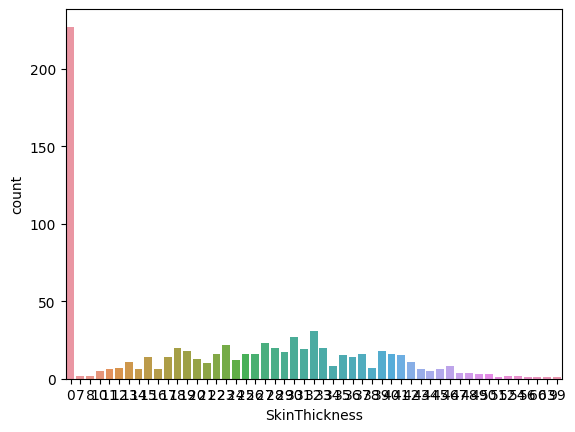

In [16]:
sns.countplot(x='SkinThickness',data=df) # Bar plot of SkinThickness column

<Axes: xlabel='Insulin', ylabel='count'>

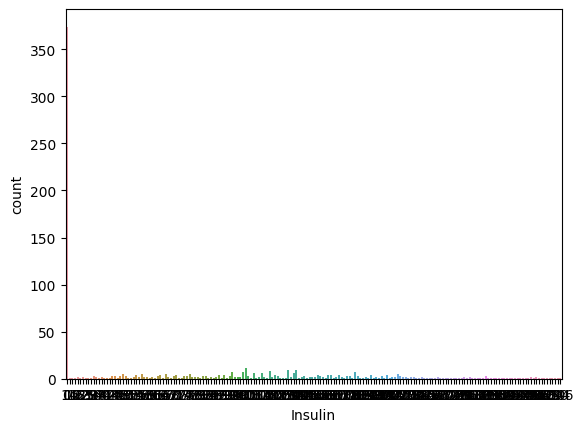

In [17]:
sns.countplot(x='Insulin',data=df) # Bar plot of Insulin column

<Axes: xlabel='BMI', ylabel='count'>

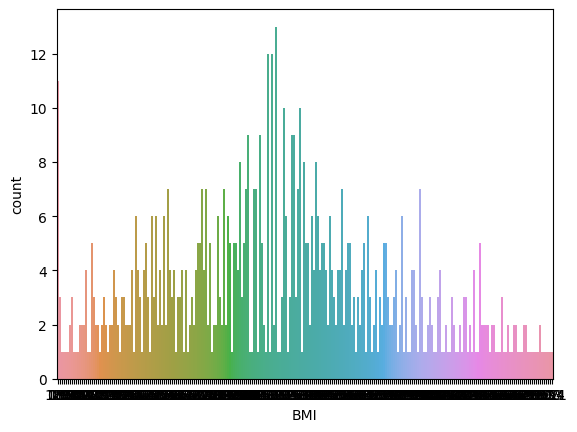

In [18]:
sns.countplot(x='BMI',data=df) # Bar plot of BMI column

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='count'>

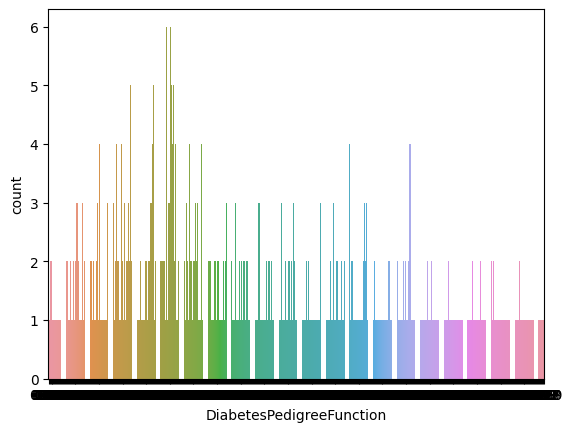

In [19]:
sns.countplot(x='DiabetesPedigreeFunction',data=df) # Bar plot of DiabetesPedigreeFunction column

<Axes: xlabel='Age', ylabel='count'>

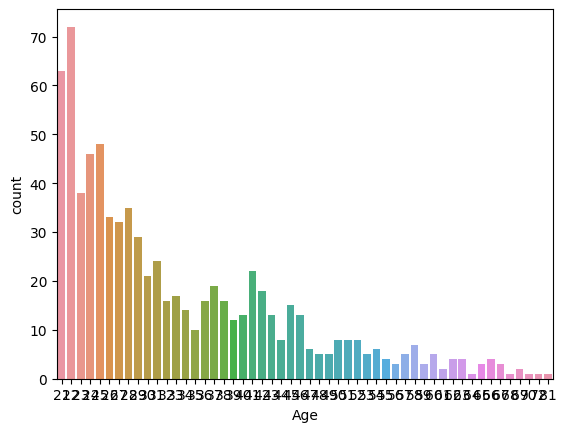

In [20]:
sns.countplot(x='Age',data=df) # Bar plot of Age column

<Axes: xlabel='Outcome', ylabel='count'>

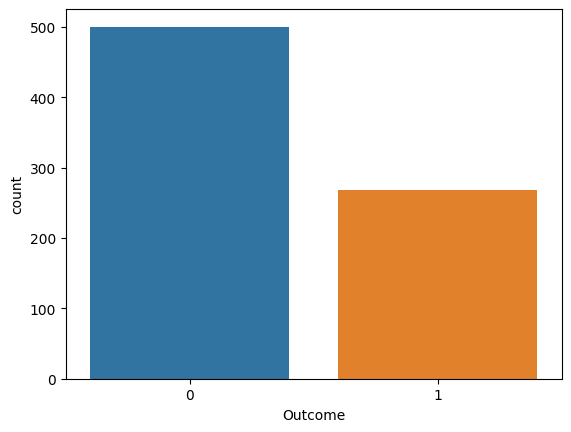

In [21]:
sns.countplot(x='Outcome',data=df) # Bar plot of Outcome column

# Data Visualization

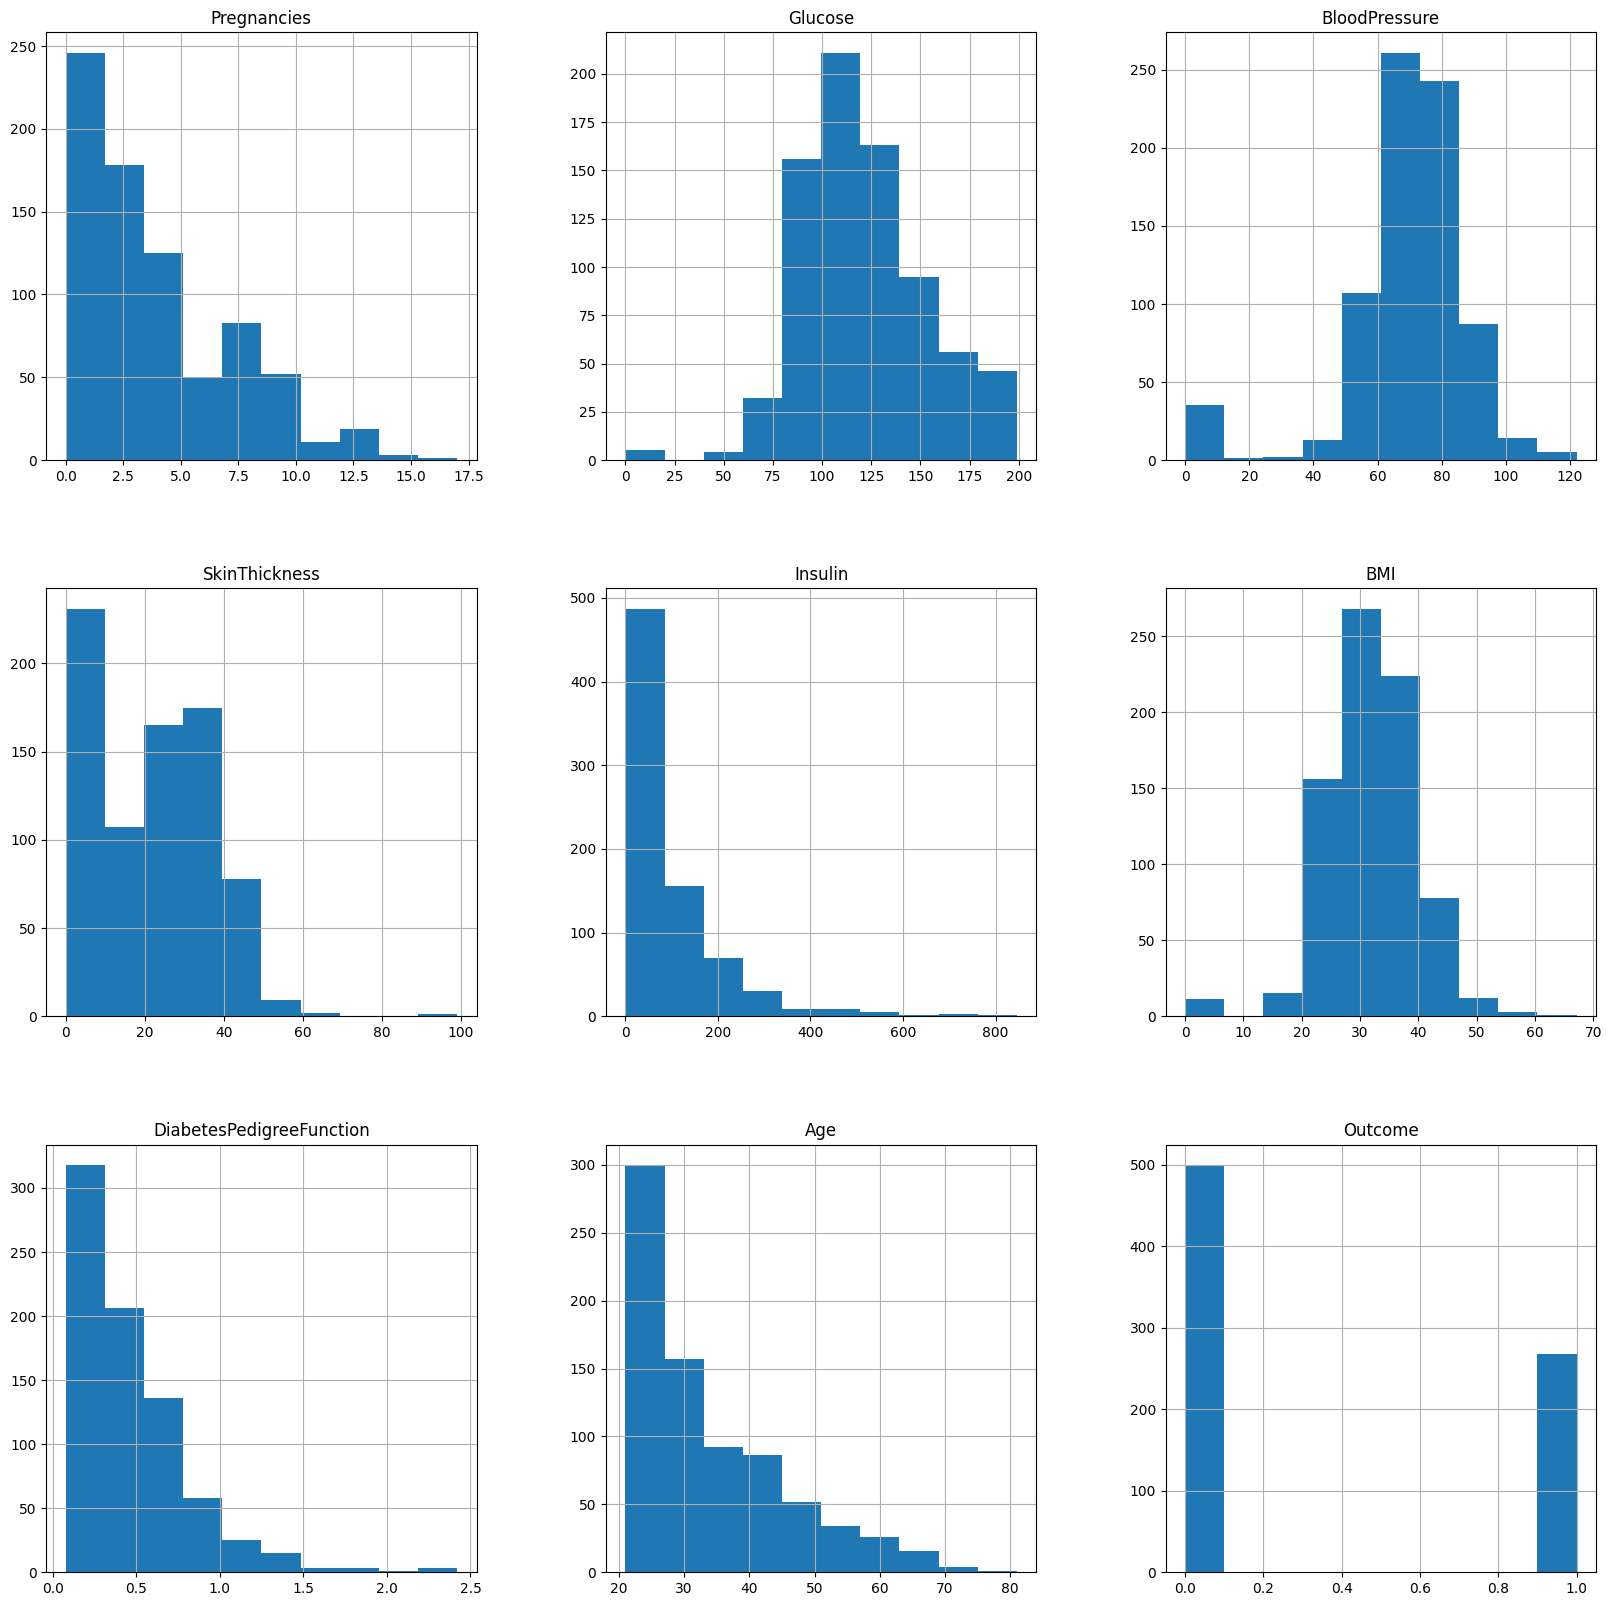

In [22]:
# Plotting the data distribution plot(histogram is the representation of the distribution oof data)
p=df.hist(figsize=(20,20))

* There is only two outcomes 0 and 1.
* here nearly 280 people have diabetes.
* Nearly 500 people do not have diabetes.
* Hrere 250 peoples are 0 or 1 times pregnancies.
* Nearly 170 peoples are pregnant in more than 2 times.
* We observe that blodpressure is 0 nearly 30 people.
* here young people have more diabetes.
* Skinthickness is nearly 0 around 250 people.


In [25]:
#Aming to impute NAN values for the columns in accordance with their distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

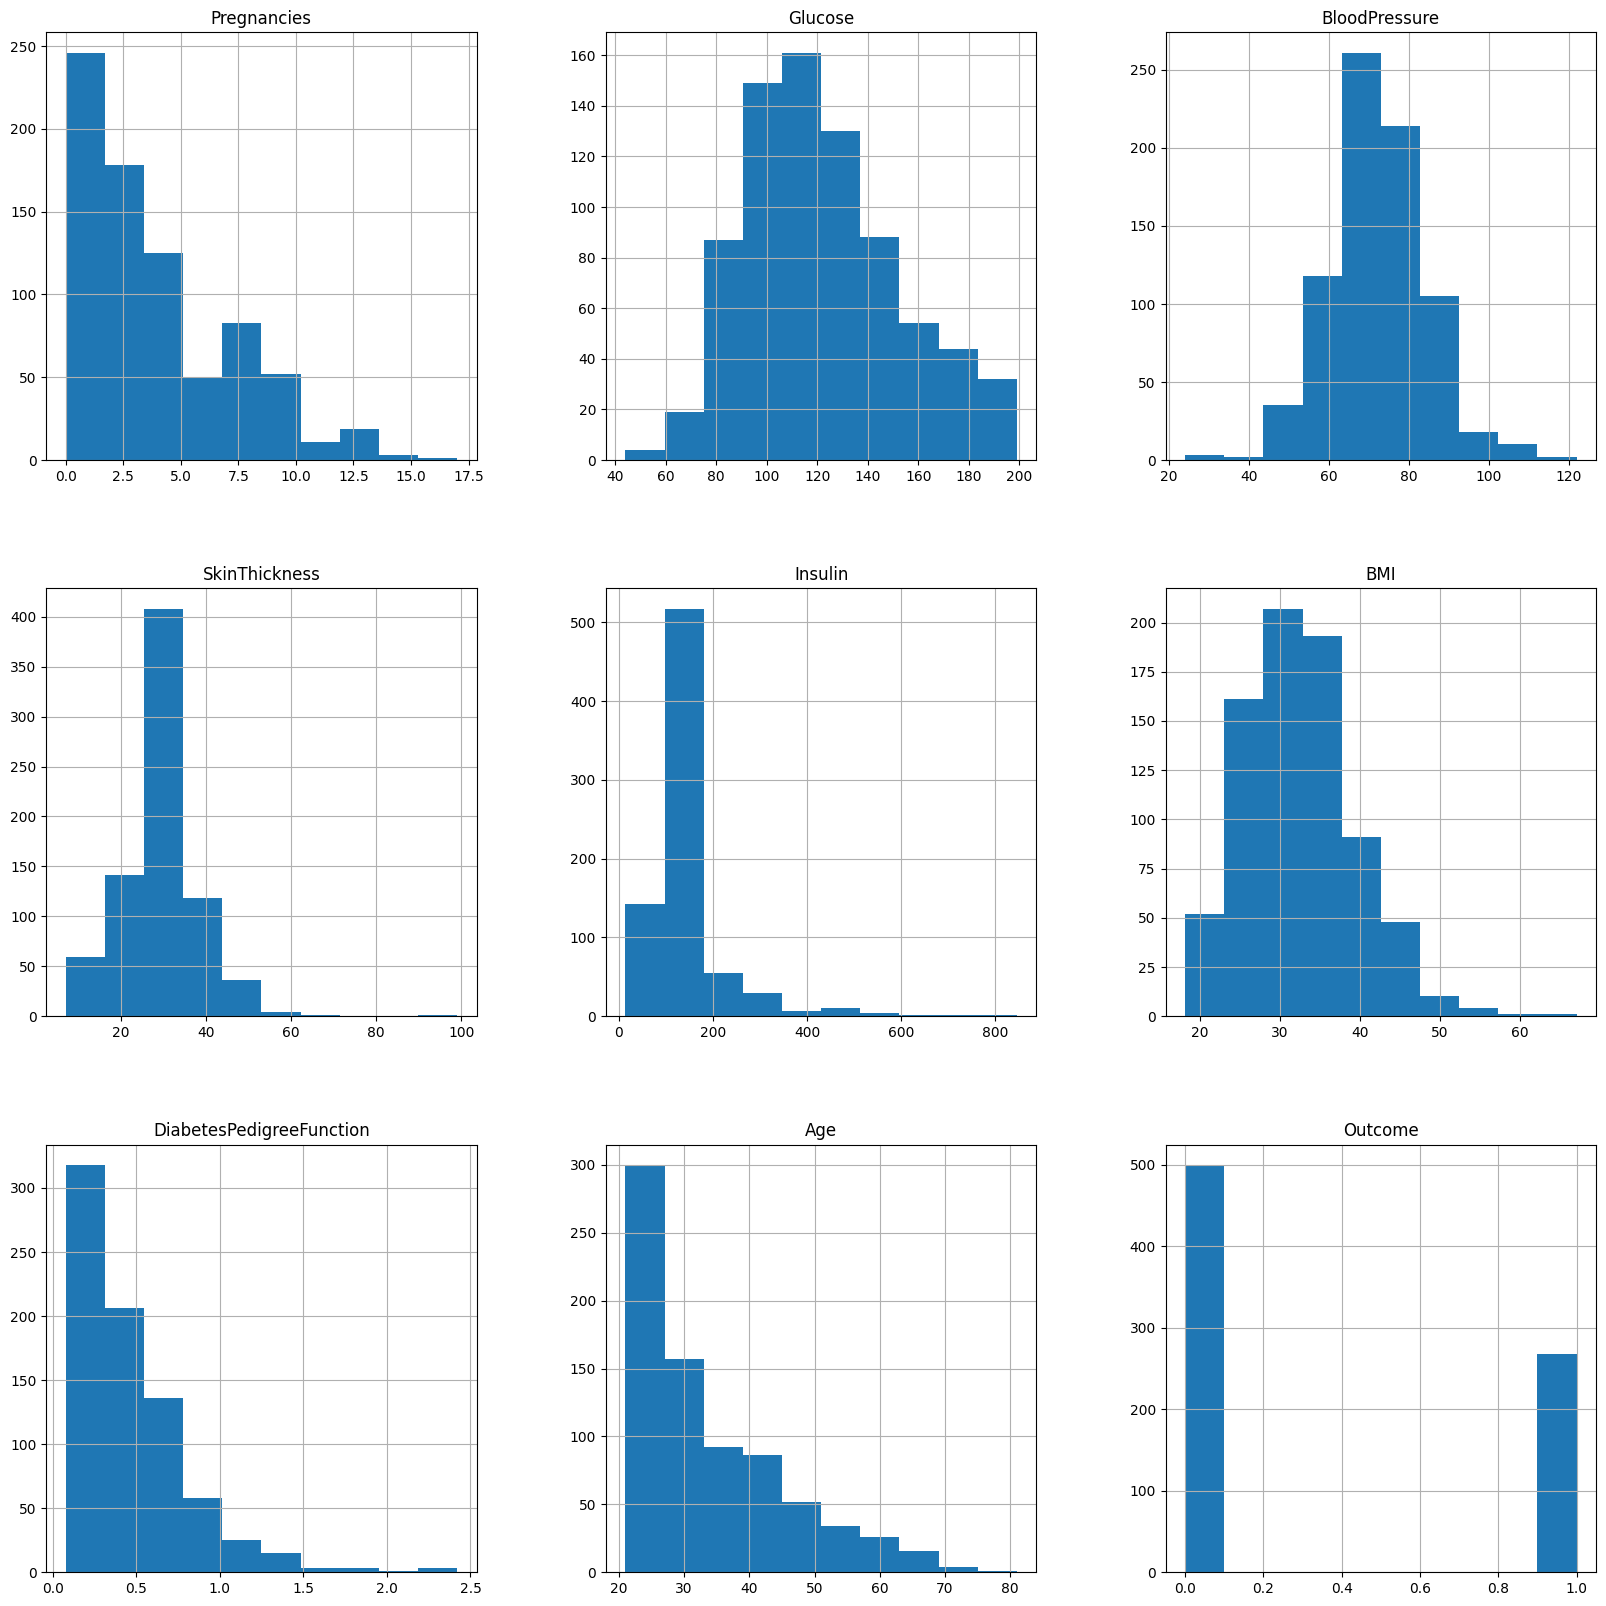

In [26]:
#Plotting the distribution after removing the NAN values
p=df_copy.hist(figsize=(20,20))

* Changing in Glucose histogram
* doesnot change in pregnancies figure and outcome figure
* As we have modify the dataset distribution have change

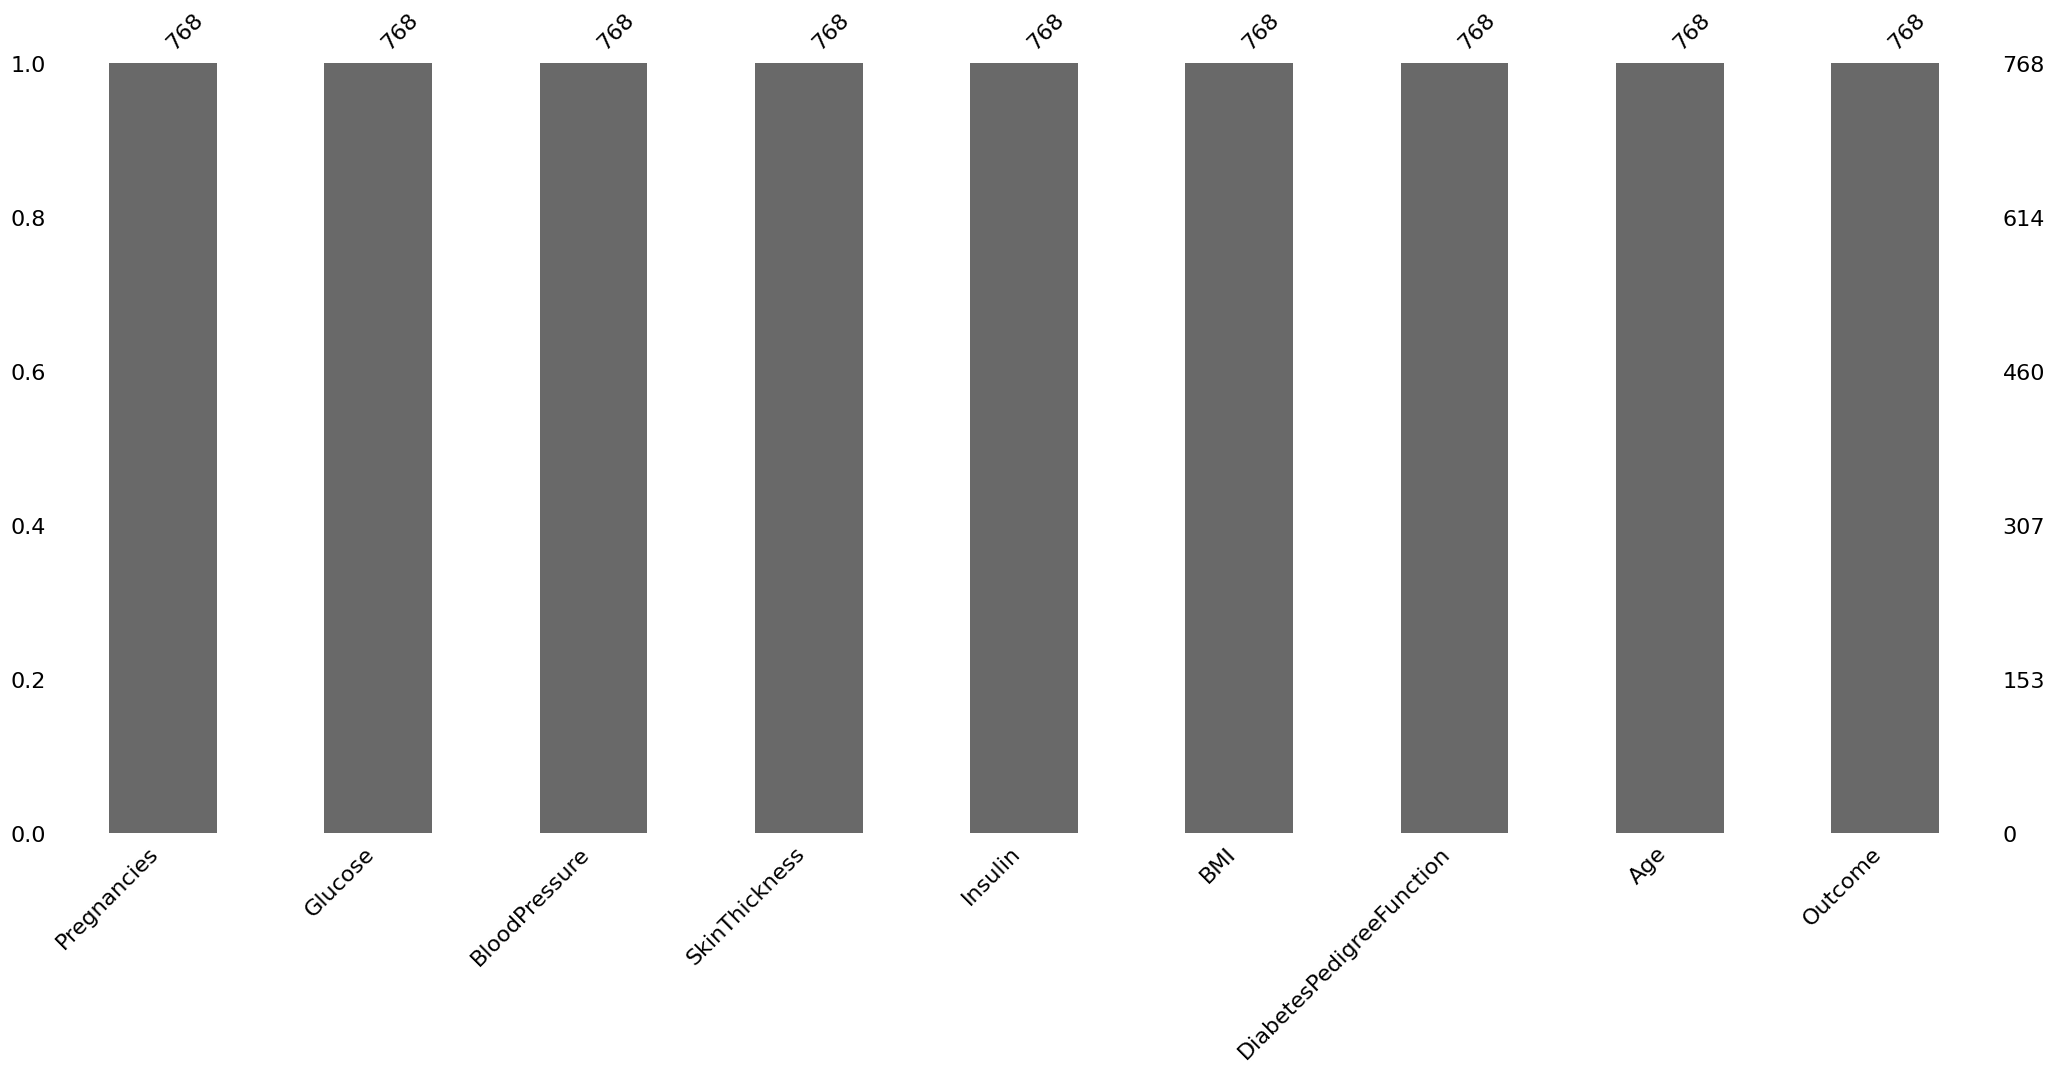

In [38]:
# Ploting null count analysis
p=msno.bar(df)

Outcome
0    500
1    268
Name: count, dtype: int64


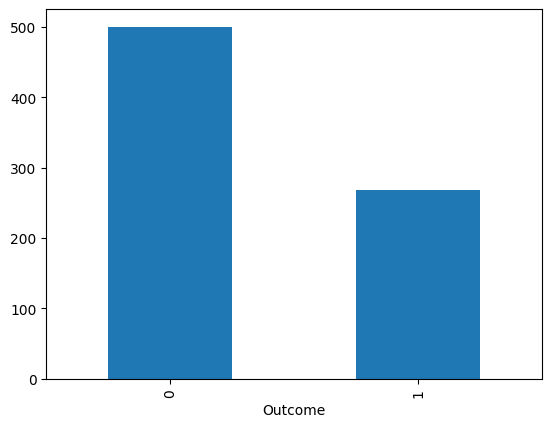

In [27]:
# checking the balance of the data by plotting the count of the outcomes by their values
color_wheel={1: "red",2: "blue"}
colors=df["Outcome"].map(lambda x : color_wheel.get(x+1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")


* 500 peoples do not have diabetes.
* 268 peoples have diabetes.

The above graph shows that the data is biased towards datapoints having outcomes values as 0 where it means that diabetes was not present actually.The number of no diabetes is almost twice the number of diabetic patients.

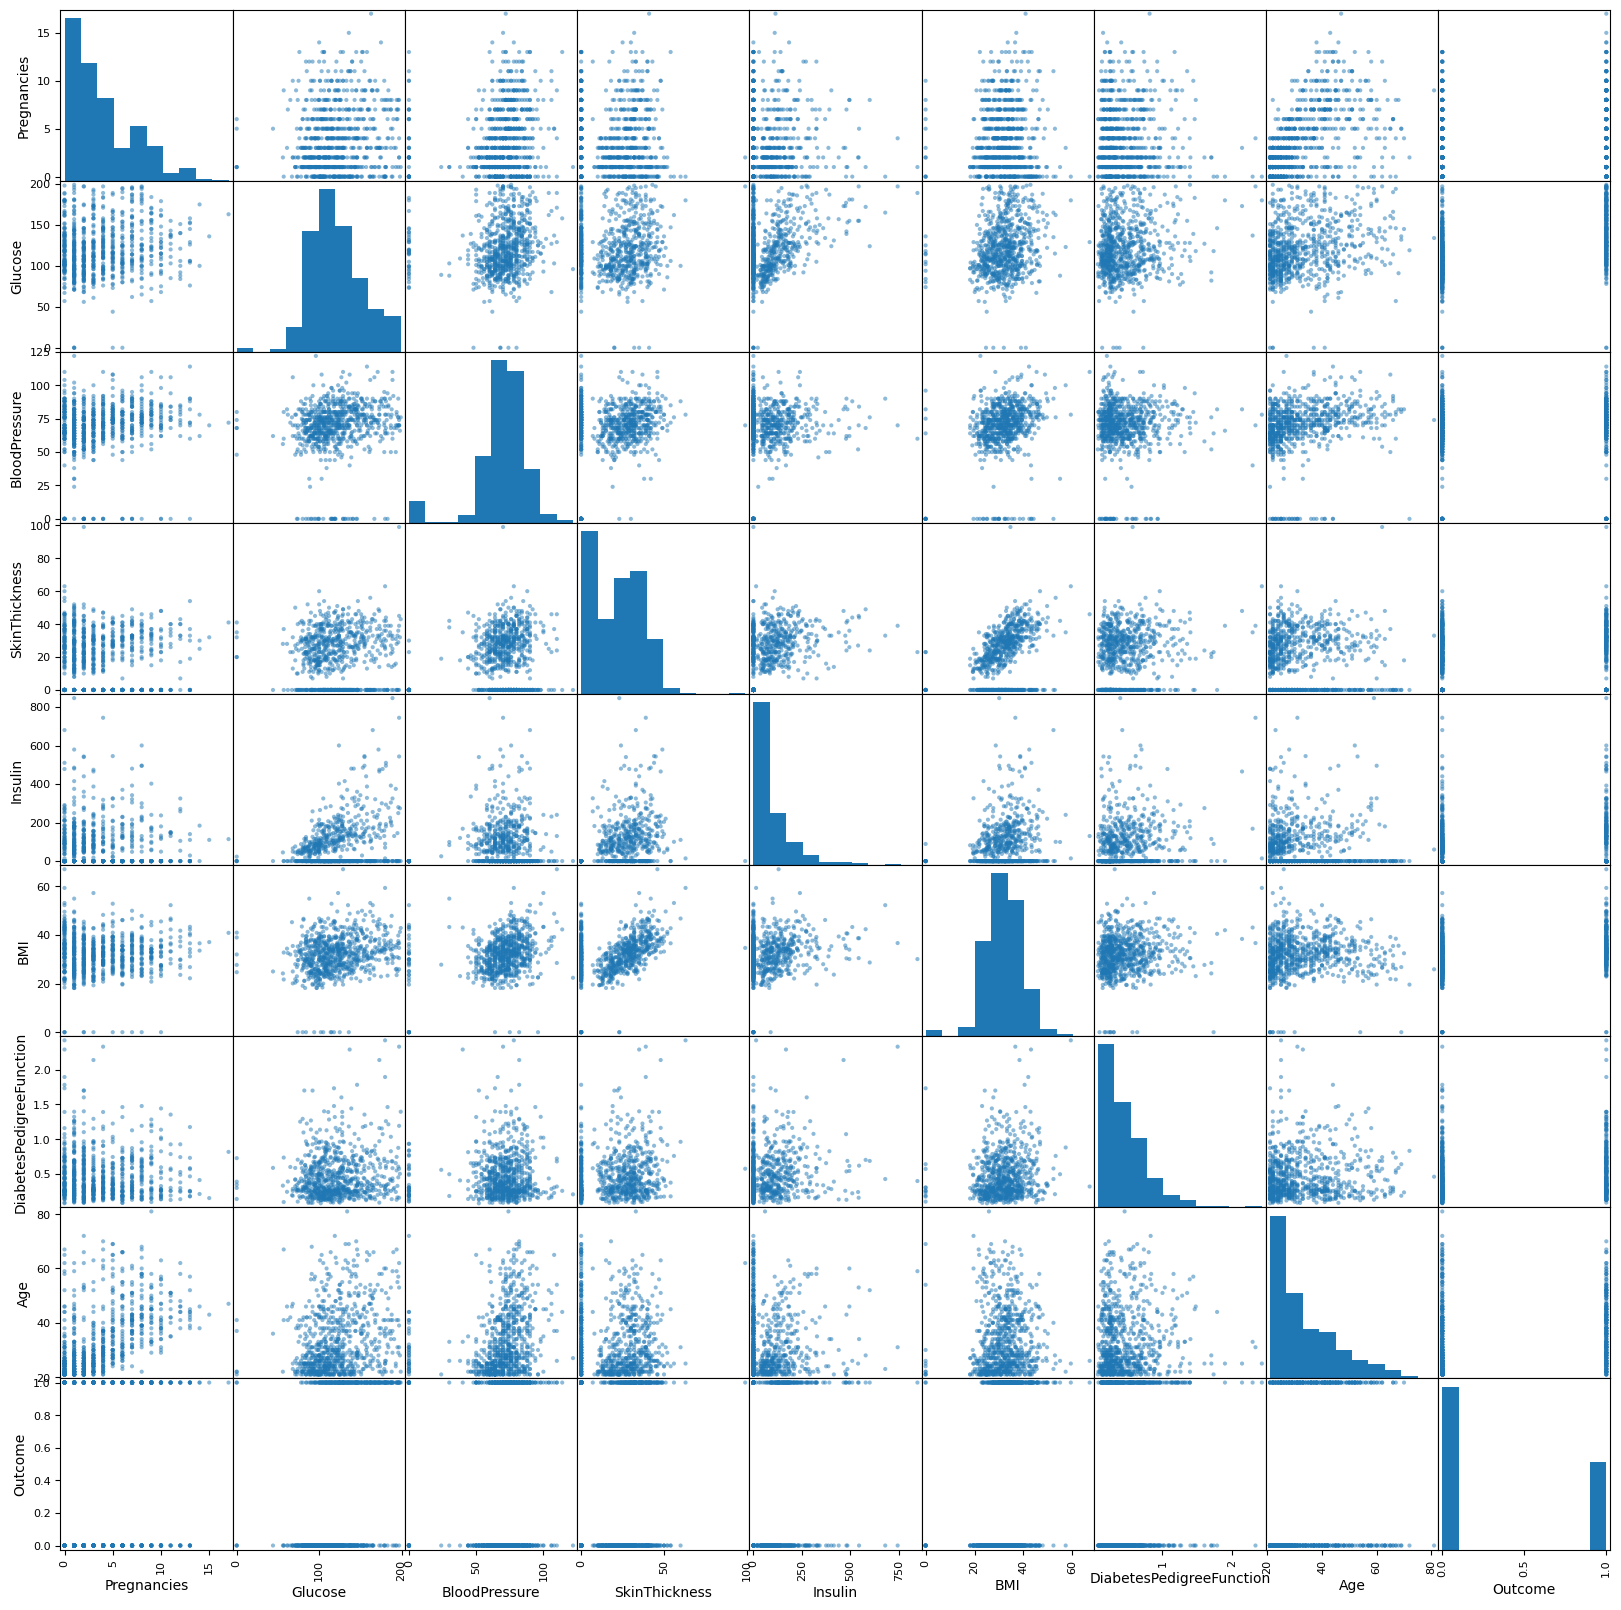

In [28]:
# Ploting the scatter matrix of uncleaned data.
p=scatter_matrix(df,figsize=(20,20))

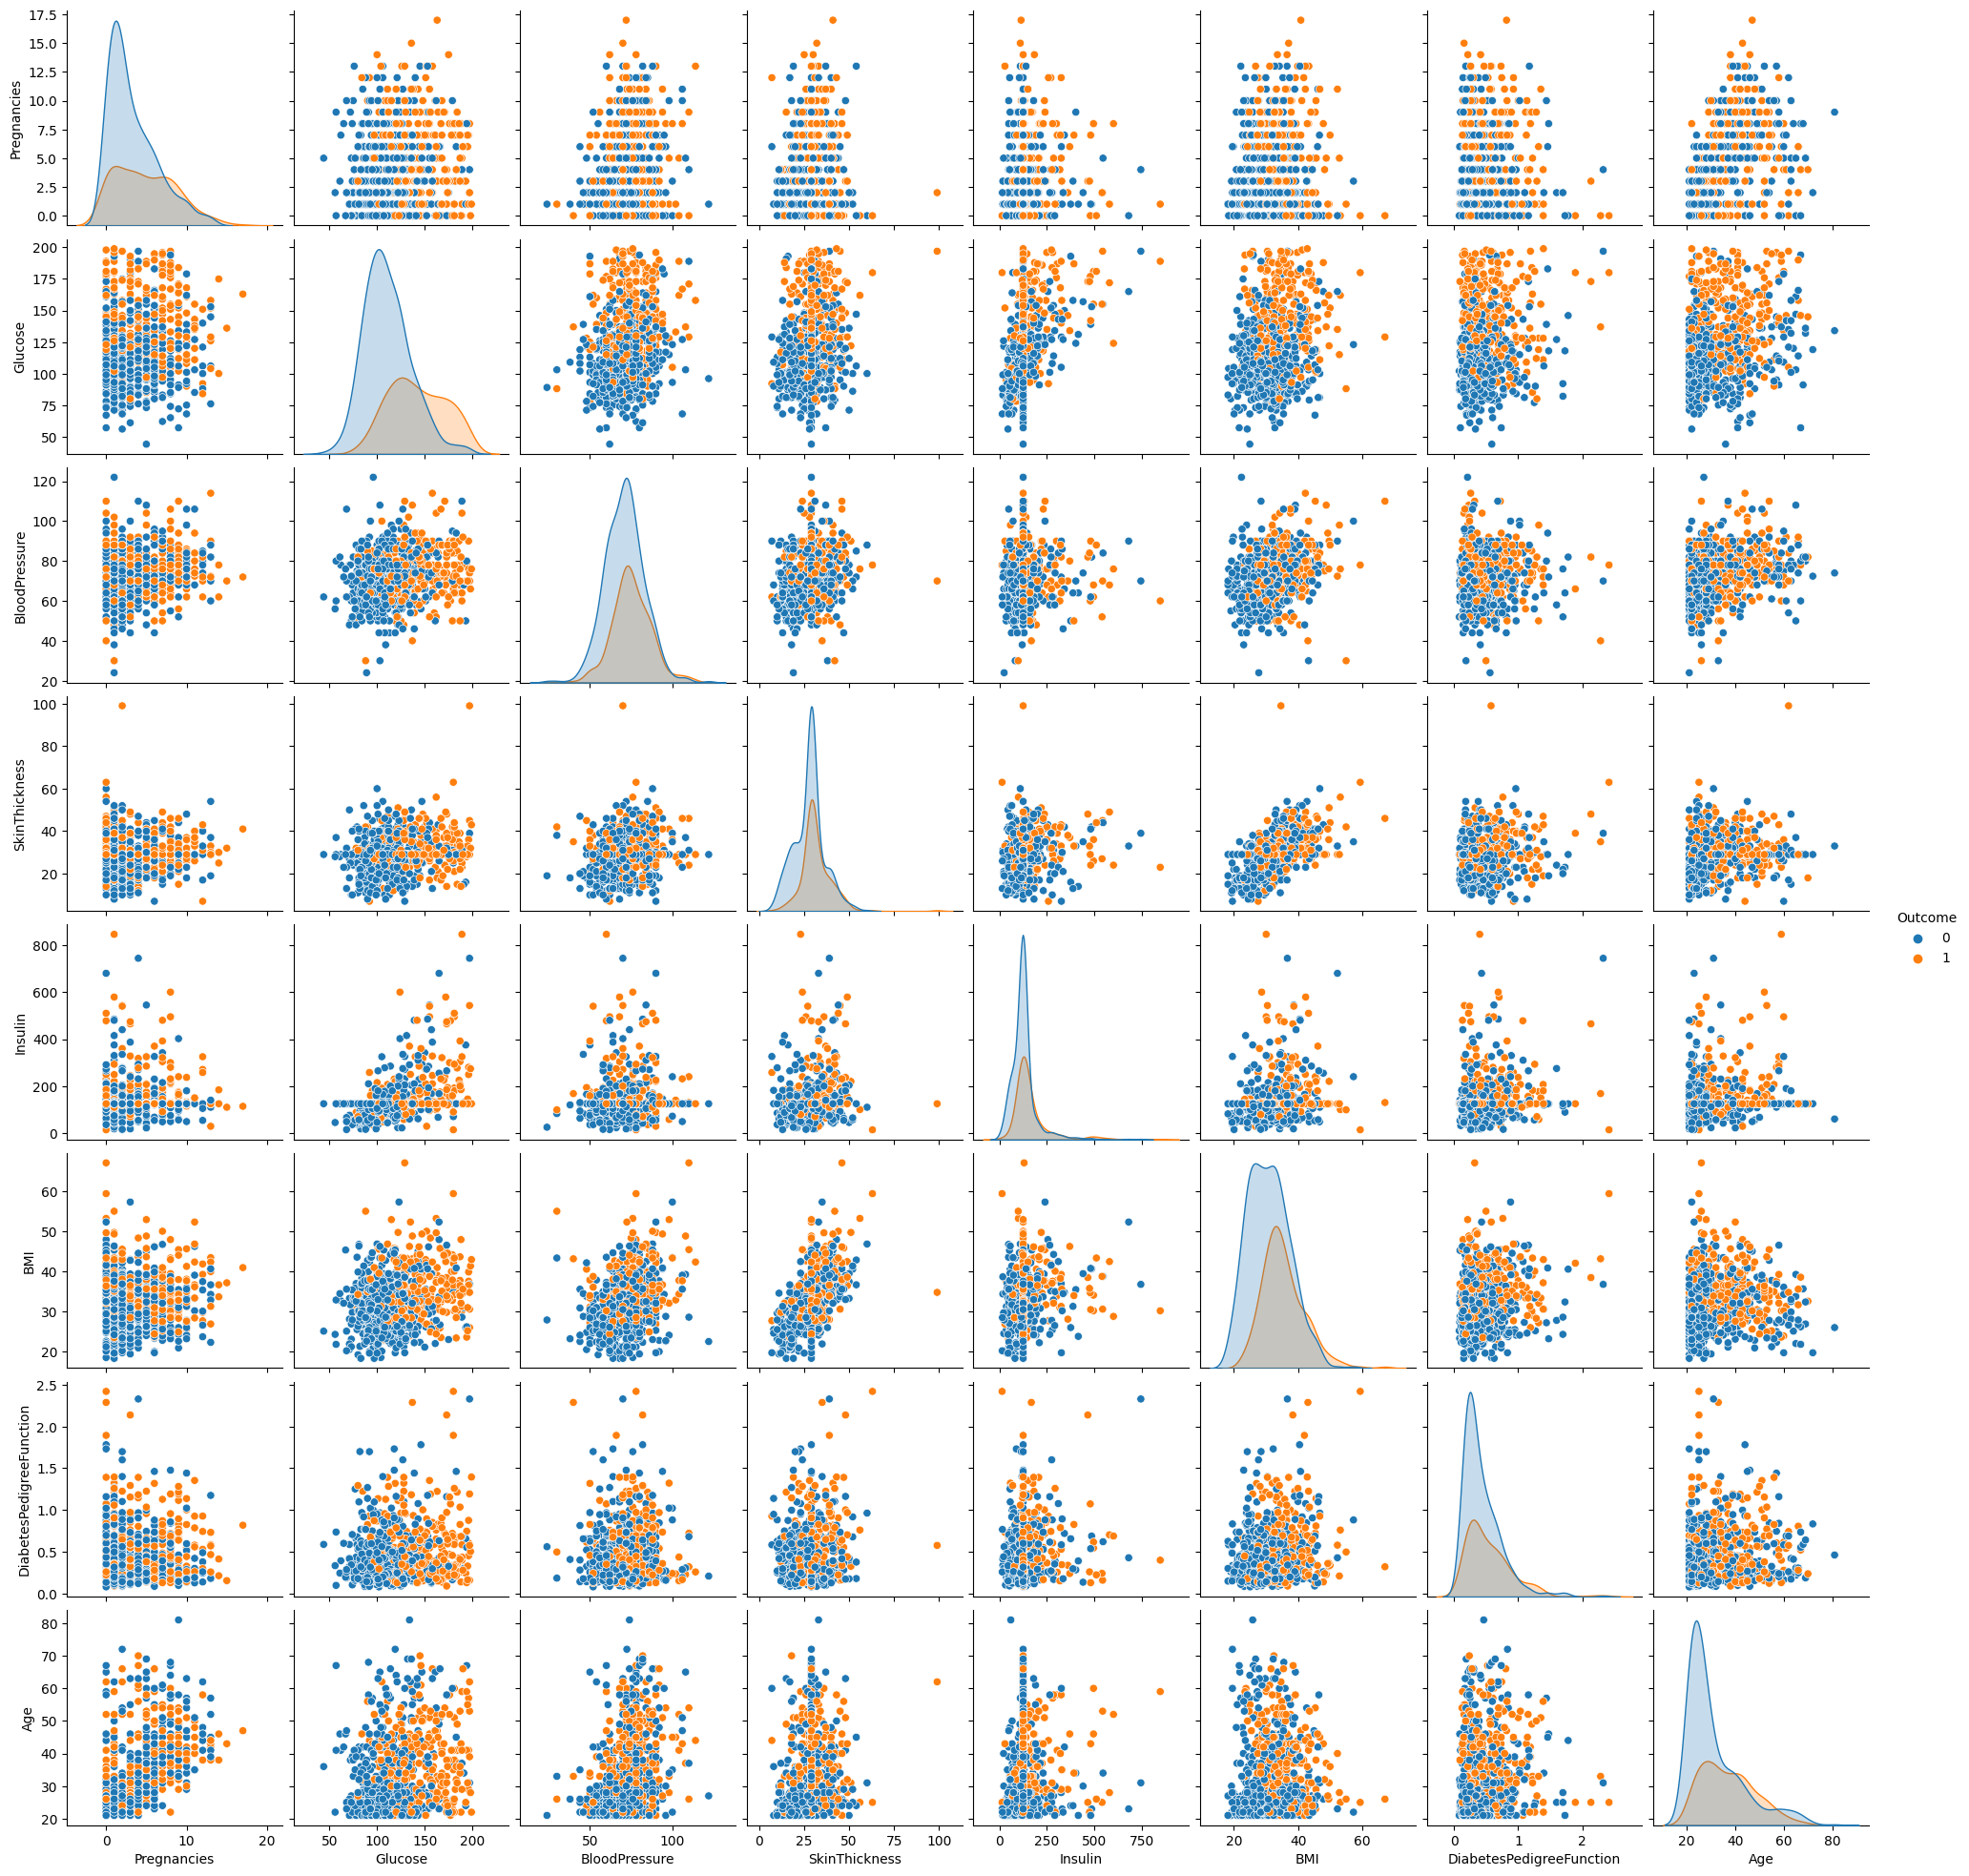

In [29]:
# plotting the pair plot for the data
p=sns.pairplot(df_copy,hue='Outcome')

# Correlation between all the features

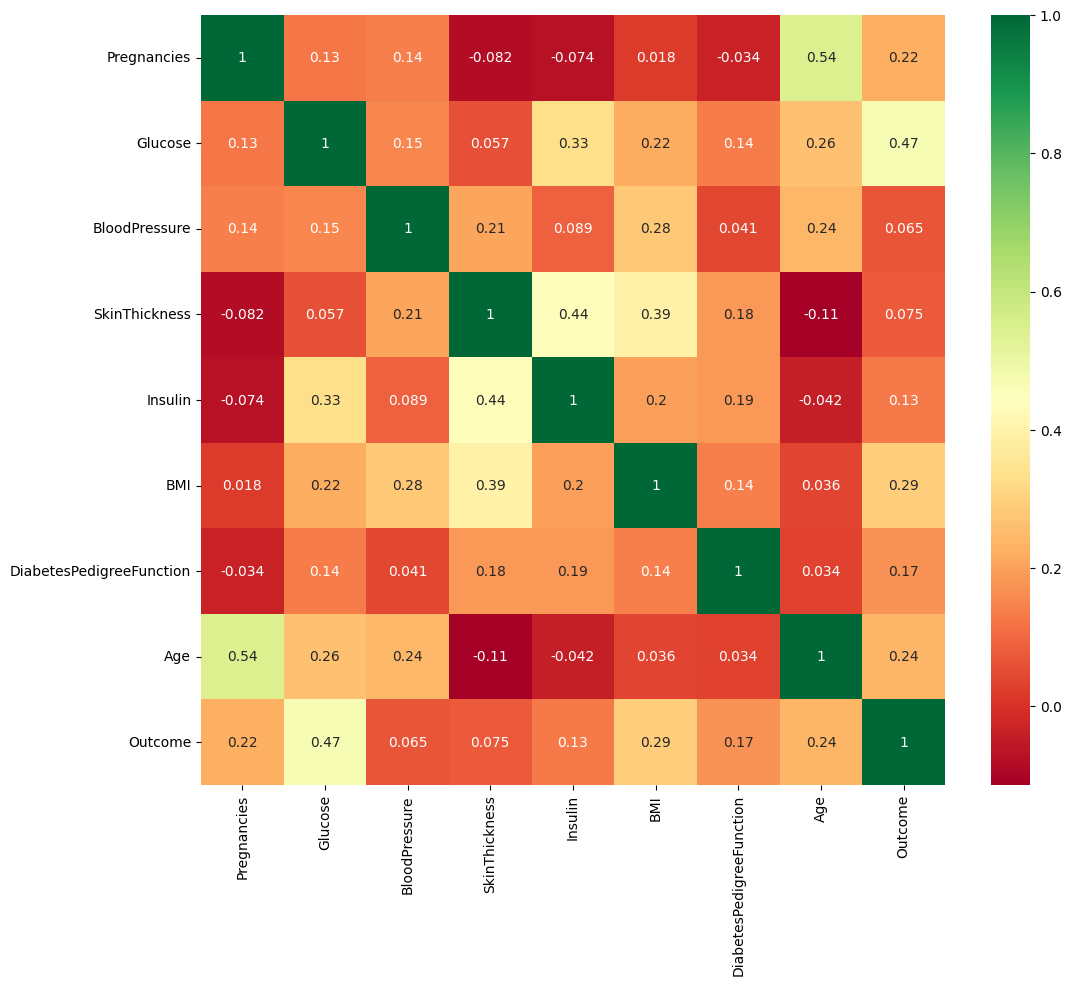

In [30]:
#Correlation between all the feature before cleaning 
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

* correlaton is use to describe the linear relationship between two variables.
* Here,glucose have highly correlated outcome and less correlated values is 0.065 for BloodPressure.

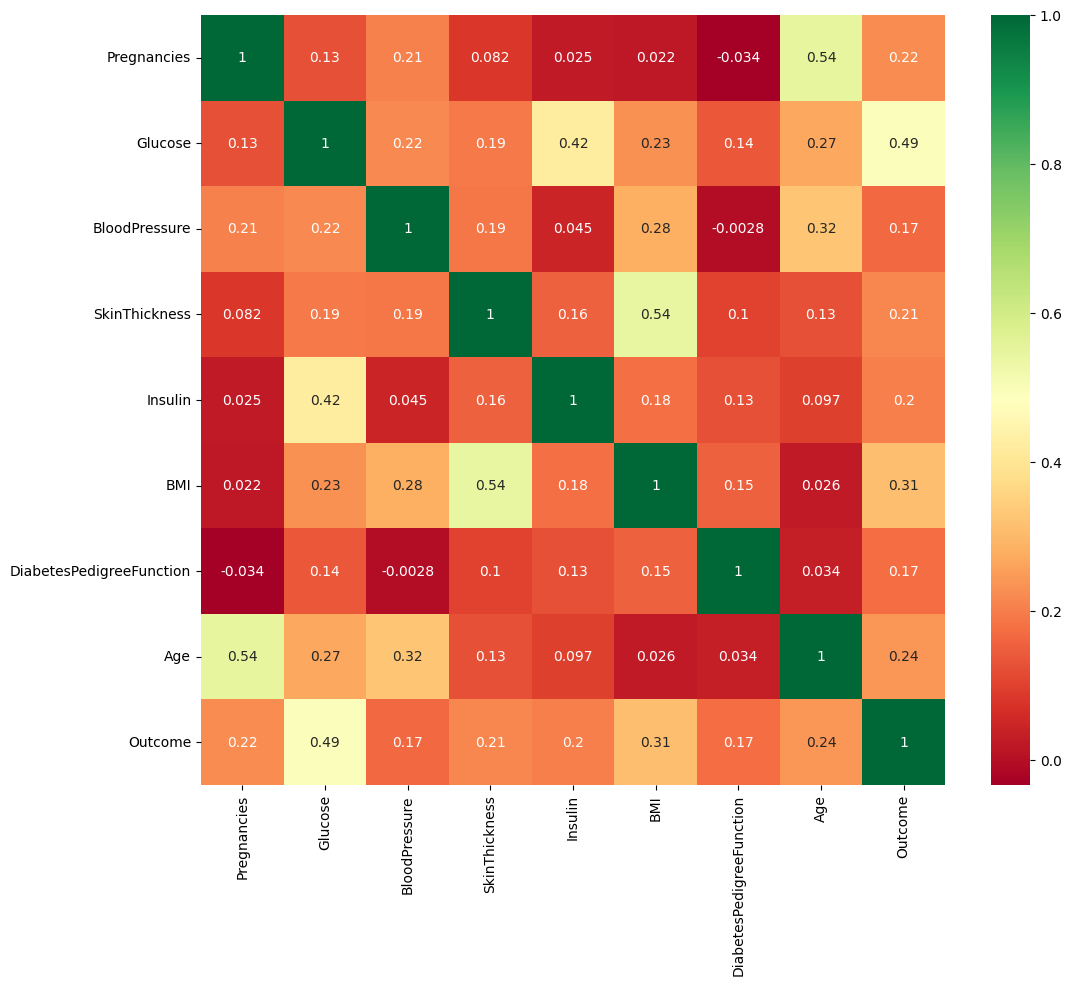

In [31]:
# correlation between all the dataframe after cleaning
plt.figure(figsize=(12,10))
p=sns.heatmap(df_copy.corr(),annot=True,cmap='RdYlGn')

* After the cleanning the data the correlation becomes more good and well correlated.

# Scaling Data

In [32]:
df_copy.head() # first 5 dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [48]:
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [49]:
y=df_copy.Outcome

In [50]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Spliting the data into Train and Test

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

# Model Bulding

## K_Nearest Neighbor(KNN)

In [55]:
test_scores=[]
train_scores=[]
for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [56]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

Here, max value is 1 means 100% accuracy

In [57]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

Here,max value is 0.76 means 76% accuracy

In [61]:
max_train_score=max(train_scores)
train_score_ind=[i for i, v in enumerate(train_scores) if v== max_train_score]
print("Max train scores {} % and k={}".format(max_train_score*100,list(map(lambda x: x+1,train_score_ind))))

Max train scores 100.0 % and k=[1]


In [63]:
max_test_score=max(test_scores)
test_score_ind=[i for i, v in enumerate(test_scores) if v== max_test_score]
print("Max test scores {} % and k={}".format(max_test_score*100,list(map(lambda x: x+1,test_score_ind))))

Max test scores 76.5625 % and k=[11]


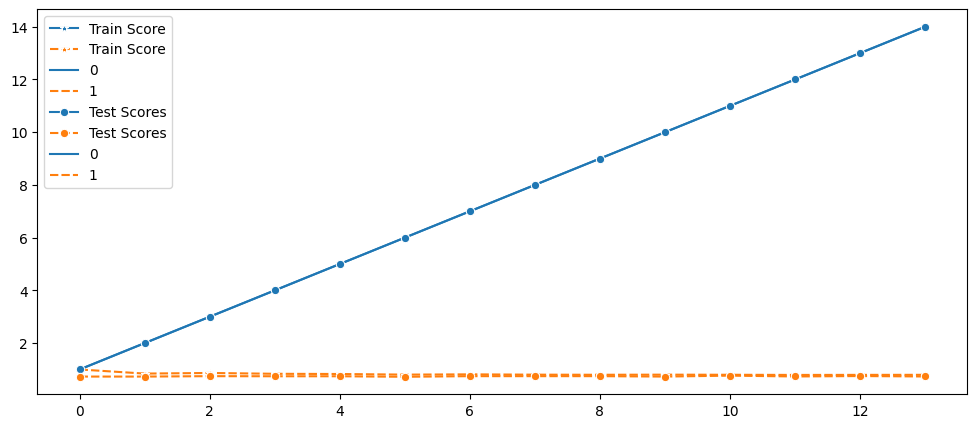

In [75]:
plt.figure(figsize=(12,5))
p = sns.lineplot(data=(range(1,15),train_scores),marker='*',label='Train Score')
p = sns.lineplot(data=(range(1,15),test_scores),marker='o',label='Test Scores')

In [77]:
knn=KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

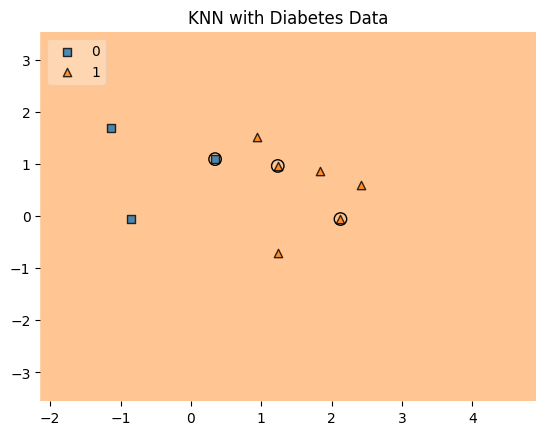

In [88]:
#Plot decision Boundary
value=20000
width=20000
plot_decision_regions(X.values,y.values,clf=knn, legend=2,
                    filler_feature_values={2: value,3: value, 4: value, 5: value, 6: value,7: value},
                    filler_feature_ranges={2: width,3: width, 4: width, 5: width,6: width,7: width},
                    X_highlight=X_test.values)
plt.title('KNN with Diabetes Data')
plt.show()

* Here, the decision boundary is non linear
* Here, orange color shows that who have diabetes and blue color shows who does not vave diabetes


# Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual Label')

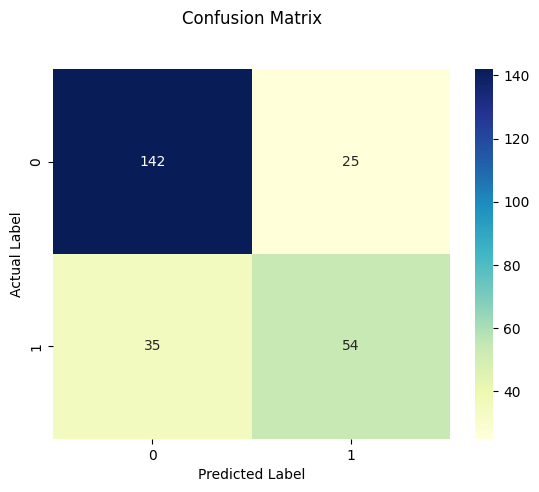

In [90]:
y_pred=knn.predict(X_test)

cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion Matrix',y=1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

* Here,142 is False positive and 35 is True Negative
* 54 is True Positive and 25 is false negative
* Total of 89 in 1 but the model predict 54 True value and miss classify 35 data
* Total of 167 in 0, the model predicted 142 correctly and miss classify 25 data

In [94]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



* At 0, precision,recall, f1_score are 0.80, 0.85,0.83 respectively
* And at 1, precision, recall, f1_score are 0.68, 0.61, 0.64 respectively

Accuracy is 77% with total of 256 supports data

# ROC-AUC Curve

## AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

In [97]:
y_pred_proba=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

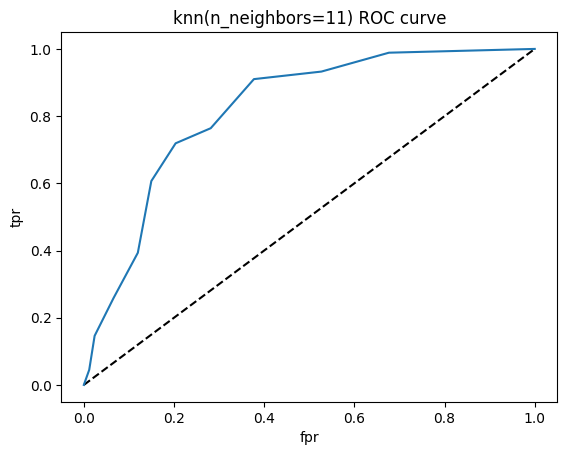

In [98]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(n_neighbors=11) ROC curve')
plt.show()

It can accurately predict the patients have diabetes or not. 

In [101]:
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

# Implementing GridSearchCV

In [113]:
# In case of classifier like KNN the parameters to be turn in n_neighbors
param_grid={'n_neighbors': np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print('Best Scores:' + str(knn_cv.best_score_))
print('Best Parameters:' + str(knn_cv.best_params_))

Best Scores:0.7721840251252015
Best Parameters:{'n_neighbors': 25}


Here, we say that the best score is 77.2% and best parameter for n_neighbors is 25.
* Approximately we get the same accuracy with 11 neighbors In KNN.